**Bahar Al Hamid - 0706022210033**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## Load Dataset

In [6]:

# Import dataset
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-7/refs/heads/main/bank.csv"
df = pd.read_csv(url)
df = pd.read_csv(url, sep=";")

# Tampilkan informasi dasar tentang dataset
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_info, df_head, df_description

# Periksa kembali nama kolom untuk memastikan semua kolom telah dipisahkan dengan benar
print(df.columns)

# Tampilkan 5 baris pertama untuk memverifikasi
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'conta

## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




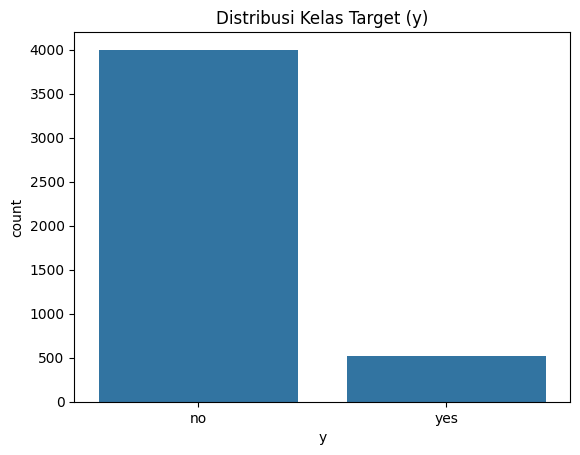

Jumlah nilai 'unknown' dalam setiap kolom:
 age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


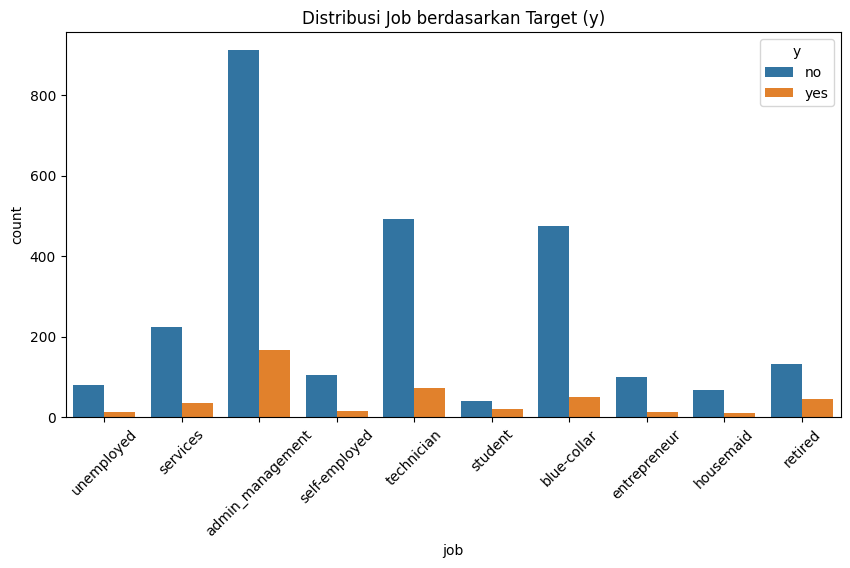

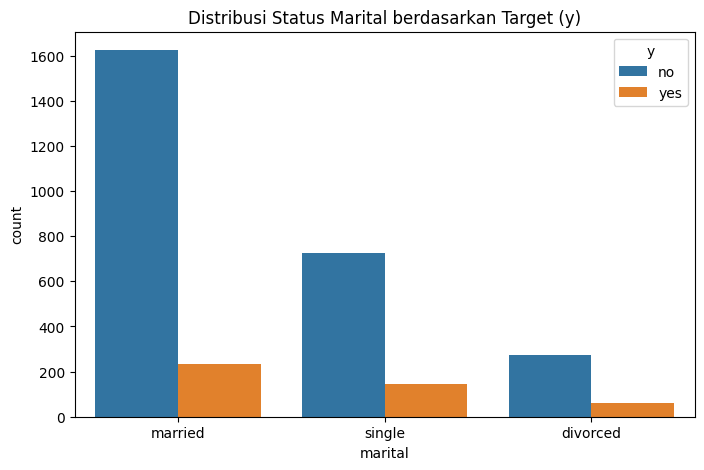

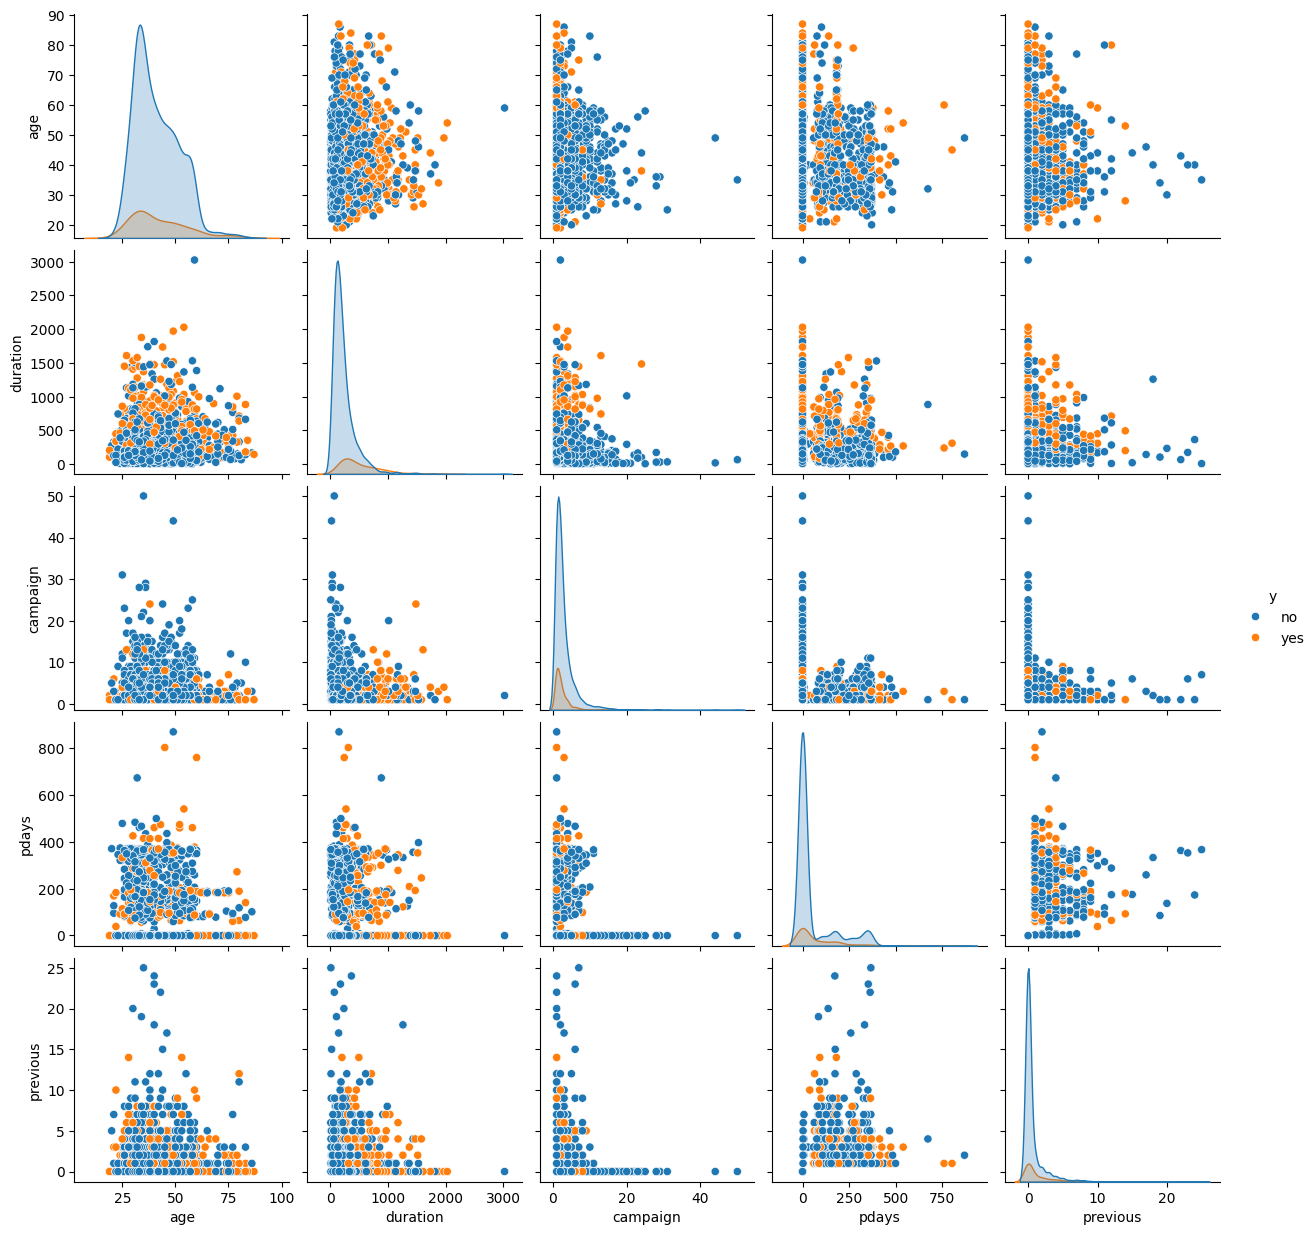

In [7]:

# 1. Plot distribusi kelas target (kolom y)
sns.countplot(x='y', data=df)
plt.title("Distribusi Kelas Target (y)")
plt.show()

# 2. Identifikasi dan tangani nilai 'unknown' dalam kolom tertentu
# Menghitung jumlah 'unknown' dalam setiap kolom
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
print("Jumlah nilai 'unknown' dalam setiap kolom:\n", unknown_counts)

# Drop atau pertahankan 'unknown' sesuai dengan kebutuhan analisis
# Jika kita ingin menghapus baris dengan nilai 'unknown' pada kolom penting:
df = df[(df['job'] != 'unknown') & (df['education'] != 'unknown') & (df['contact'] != 'unknown')]

# 3. Gabungkan nilai yang mirip
# Menggabungkan nilai 'admin.' dan 'management' di kolom job menjadi 'admin_management'
df['job'] = df['job'].replace({'admin.': 'admin_management', 'management': 'admin_management'})

# Visualisasi setelah preprocessing
# 4. Visualisasi distribusi job dan marital status untuk melihat korelasinya dengan target
plt.figure(figsize=(10, 5))
sns.countplot(x='job', hue='y', data=df)
plt.title("Distribusi Job berdasarkan Target (y)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=df)
plt.title("Distribusi Status Marital berdasarkan Target (y)")
plt.show()

# 5. Pairplot pada beberapa fitur numerik dengan target y untuk melihat pola
sns.pairplot(df, vars=['age', 'duration', 'campaign', 'pdays', 'previous'], hue='y', diag_kind="kde")
plt.show()

## Machine Learning

In [8]:

# 1. Splitting X (features) and y (target)
X = df.drop(columns=['y'])  # Menghapus kolom target dari fitur
y = df['y']  # Kolom target

# 2. Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek bentuk (shape) dari X_train dan X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (2451, 16)
Shape of X_test: (613, 16)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Identifikasi kolom kategorikal
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Buat pipeline untuk encoding dan training
pipeline = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), categorical_columns)
        ], remainder='passthrough')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# a. Defining and training the model
pipeline.fit(X_train, y_train)

# b. Predict the test set results
y_pred_rf = pipeline.predict(X_test)

# c. Check accuracy score
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# d. Confusion matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", rf_conf_matrix)

# e. Classification report
rf_class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", rf_class_report)

# f. Results and conclusion
print("\nResults and Conclusion:")
print(f"The Random Forest model achieved an accuracy of {rf_accuracy:.2f}. The confusion matrix shows the classification results, and the classification report provides precision, recall, and F1-score for each class.")


Random Forest Accuracy: 0.8972267536704731
Confusion Matrix:
 [[523  10]
 [ 53  27]]
Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.98      0.94       533
         yes       0.73      0.34      0.46        80

    accuracy                           0.90       613
   macro avg       0.82      0.66      0.70       613
weighted avg       0.88      0.90      0.88       613


Results and Conclusion:
The Random Forest model achieved an accuracy of 0.90. The confusion matrix shows the classification results, and the classification report provides precision, recall, and F1-score for each class.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# a. Defining the model (Gradient Boosting Classifier)
pipeline_gb = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), categorical_columns)
        ], remainder='passthrough')),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train the Gradient Boosting model using the training data
pipeline_gb.fit(X_train, y_train)

# b. Predict the test set results
y_pred_gb = pipeline_gb.predict(X_test)

# c. Check accuracy score
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

# d. Confusion matrix
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n", gb_conf_matrix)

# e. Classification report
gb_class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:\n", gb_class_report)

# f. Results and conclusion
print("\nResults and Conclusion:")
print(f"The Gradient Boosting model achieved an accuracy of {gb_accuracy:.2f}. The confusion matrix and classification report provide detailed performance metrics.")


Gradient Boosting Accuracy: 0.9021207177814029
Confusion Matrix:
 [[518  15]
 [ 45  35]]
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95       533
         yes       0.70      0.44      0.54        80

    accuracy                           0.90       613
   macro avg       0.81      0.70      0.74       613
weighted avg       0.89      0.90      0.89       613


Results and Conclusion:
The Gradient Boosting model achieved an accuracy of 0.90. The confusion matrix and classification report provide detailed performance metrics.
